# Análisis exploratorio de `tmdb_movies.db`
Este notebook recorre todas las tablas de la base de datos SQLite, muestra su tamaño, el esquema de cada tabla y genera algunas visualizaciones sencillas para comprender la distribución de los datos.

In [4]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid')
DB_PATH = 'tmdb_movies.db'
con = sqlite3.connect(DB_PATH)
print('Conectado a', DB_PATH)

Conectado a tmdb_movies.db


## Listado de tablas y recuento de filas

In [5]:
tables_df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", con)
tables = tables_df['name'].tolist()
sizes = {}
for tbl in tables:
    sizes[tbl] = pd.read_sql(f'SELECT COUNT(*) AS n FROM {tbl}', con)['n'][0]
sizes_df = pd.DataFrame.from_dict(sizes, orient='index', columns=['rows']).sort_values('rows', ascending=False)
display(sizes_df.head(20))

,rows
movie_cast,345474
people,179886
ratings,100843
movie_crew,31193
movie_production_companies,27990
movie_genres,24455
movie_spoken_languages,14100
movie_production_countries,13384
movies,9622
production_companies,8972


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\400694262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sizes_df.index, x='rows', data=sizes_df.head(20), palette='viridis')


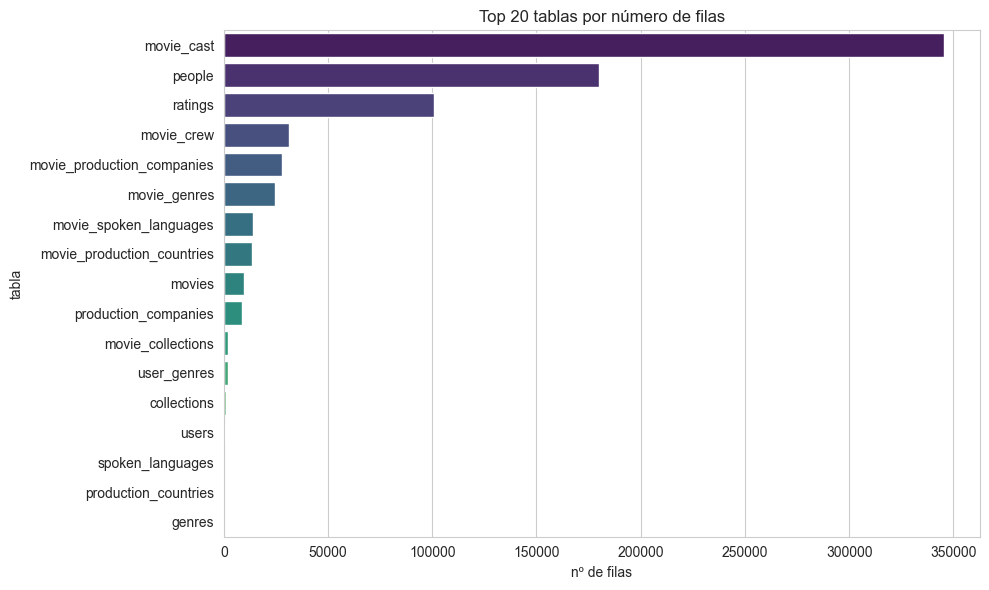

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(y=sizes_df.index, x='rows', data=sizes_df.head(20), palette='viridis')
plt.title('Top 20 tablas por número de filas')
plt.xlabel('nº de filas')
plt.ylabel('tabla')
plt.tight_layout()
plt.show()

## Función de ayuda para explorar columnas

In [7]:
def explore_table(table, top_n=10):
    print(f'\nTabla: {table}')
    # esquema
    schema = pd.read_sql(f'PRAGMA table_info({table})', con)
    display(schema)
    # muestra rápida
    df = pd.read_sql(f'SELECT * FROM {table} LIMIT 5', con)
    display(df)
    # para cada columna categórica / pequeña cardinalidad -> top valores
    full_df = pd.read_sql(f'SELECT * FROM {table}', con)
    for col in full_df.columns:
        if full_df[col].dtype == 'object' or full_df[col].nunique() <= 50:
            vc = full_df[col].value_counts().head(top_n)
            if vc.empty: continue
            print(f'\nTop {top_n} en {col}')
            display(vc.to_frame('count'))
            plt.figure(figsize=(6,3))
            sns.barplot(x=vc.values, y=vc.index, palette='crest')
            plt.title(f'Top {top_n} {col}')
            plt.xlabel('frecuencia')
            plt.tight_layout()
            plt.show()

## Ejemplo: explorar tabla `movies`


Tabla: movies


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,tmdb_id,INTEGER,0,None,0
2,2,imdb_id,TEXT,0,None,0
3,3,title,TEXT,0,None,0
4,4,original_title,TEXT,0,None,0
5,5,overview,TEXT,0,None,0
6,6,tagline,TEXT,0,None,0
7,7,release_date,TEXT,0,None,0
8,8,runtime,INTEGER,0,None,0
9,9,budget,INTEGER,0,None,0


,movie_id,tmdb_id,imdb_id,title,original_title,overview,tagline,release_date,runtime,budget,...,popularity,vote_average,vote_count,status,adult,video,poster_path,backdrop_path,homepage,original_language
0,1,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Hang on for the comedy that goes to infinity a...,1995-11-22,81,30000000,...,28.7831,7.967,18810,Released,0,0,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,http://toystory.disney.com/toy-story,en
1,2,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,1995-12-15,104,65000000,...,3.7123,7.236,10750,Released,0,0,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,/pb0FOvhen6lVcNJ7j9z61gnwvcI.jpg,http://www.sonypictures.com/movies/jumanji/,en
2,3,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,101,25000000,...,1.4725,6.465,396,Released,0,0,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,/nh9gYaXHTNT9yylX10L9aGqFehy.jpg,,en
3,4,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,1995-12-22,127,16000000,...,1.3688,6.263,173,Released,0,0,/qJU6rfil5xLVb5HpJsmmfeSK254.jpg,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,,en
4,5,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just when his world is back to normal... he's ...,1995-12-08,106,0,...,2.1545,6.200,751,Released,0,0,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,,en



Top 10 en imdb_id


,count
imdb_id,
,2
tt0114709,1
tt0445934,1
tt0475355,1
tt0822854,1
tt0800069,1
tt0453556,1
tt0389557,1
tt0427470,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


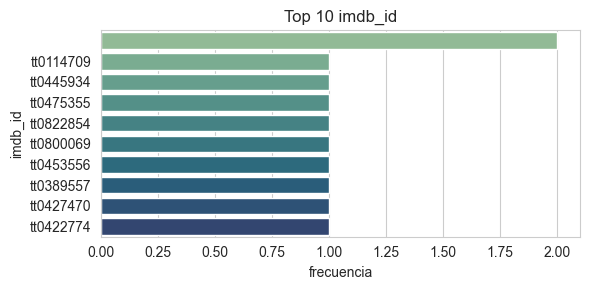


Top 10 en title


,count
title,
Jane Eyre,4
The Three Musketeers,4
A Christmas Carol,4
Hamlet,4
The Mummy,4
The Jungle Book,3
Dracula,3
Anna Karenina,3
Sisters,3


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


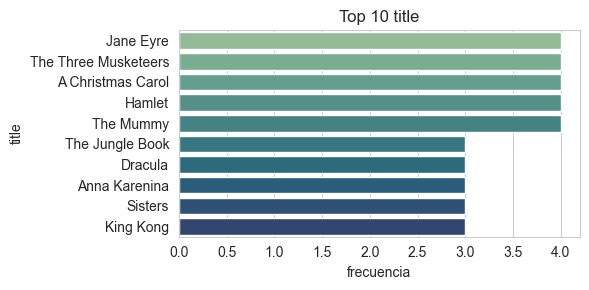


Top 10 en original_title


,count
original_title,
Jane Eyre,4
A Christmas Carol,4
The Mummy,4
The Three Musketeers,4
Hamlet,4
Little Women,3
Carrie,3
A Midsummer Night's Dream,3
Les Misérables,3


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


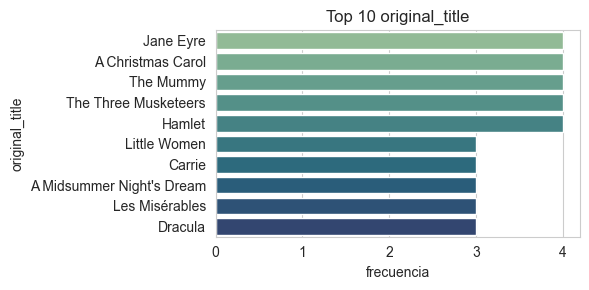


Top 10 en overview


,count
overview,
,5
"After a bleak childhood, Jane Eyre goes out into the world to become a governess. As she lives happily in her new position at Thornfield Hall, she meet the dark, cold, and abrupt master of the house, Mr. Rochester. Jane and her employer grow close in friendship and she soon finds herself falling in love with him. Happiness seems to have found Jane at last, but could Mr. Rochester's terrible secret be about to destroy it forever?",4
"Miser Ebenezer Scrooge is awakened on Christmas Eve by spirits who reveal to him his own miserable existence, what opportunities he wasted in his youth, his current cruelties, and the dire fate that awaits him if he does not change his ways. Scrooge is faced with his own story of growing bitterness and meanness, and must decide what his own future will hold: death or redemption.",4
"Widowed Welsh mother Anna Loenowens becomes a governess and English tutor to the wives and many children of the stubborn King Mongkut of Siam. Anna and the King have a clash of personalities as she works to teach the royal family about the English language, customs and etiquette, and rushes to prepare a party for a group of European diplomats who must change their opinions about the King.",2
"In a woods filled with magic and fairy tale characters, a baker and his wife set out to end the curse put on them by their neighbor, a spiteful witch.",2
"Broadway producer Max Bialystock and his accountant, Leo Bloom plan to make money by charming wealthy old biddies to invest in a production many times over the actual cost, and then put on a sure-fire flop, so nobody will ask for their money back – and what can be a more certain flop than a tasteless musical celebrating Hitler.",2
"Humbert Humbert is a middle-aged British novelist who is both appalled by and attracted to the vulgarity of American culture. When he comes to stay at the boarding house run by Charlotte Haze, he soon becomes obsessed with Lolita, the woman's teenaged daughter.",2
Director Michael Apted revisits the same group of British-born adults after a 7 year wait. The subjects are interviewed as to the changes that have occurred in their lives during the last seven years.,2
"Wilbur the pig is scared of the end of the season, because he knows that come that time, he will end up on the dinner table. He hatches a plan with Charlotte, a spider that lives in his pen, to ensure that this will never happen.",2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')
C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


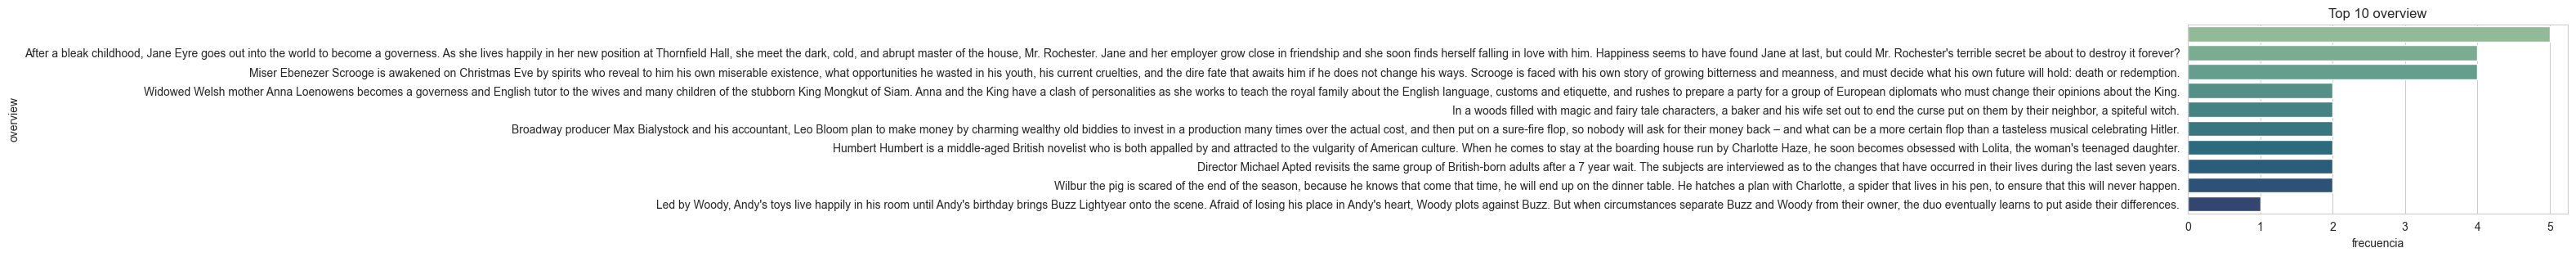


Top 10 en tagline


,count
tagline,
,1321
Based on a true story.,4
Be careful what you wish for.,3
A comedy to arouse your appetite.,2
Touched by Genius. Cursed by Madness. Blinded by Love.,2
What could go wrong?,2
Heaven help us.,2
This time it's war.,2
It could happen to you.,2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


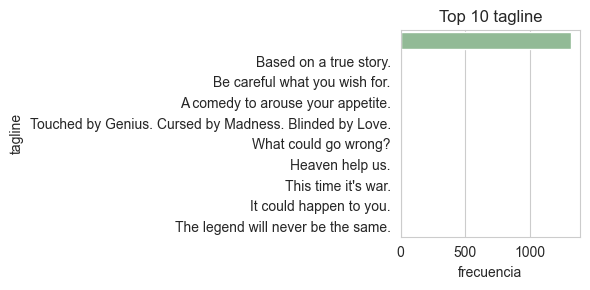


Top 10 en release_date


,count
release_date,
2006-09-09,9
2002-10-11,8
1995-09-15,7
1998-10-23,7
1993-10-01,7
1995-09-22,7
1999-10-22,7
2000-09-01,7
2002-09-06,7


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


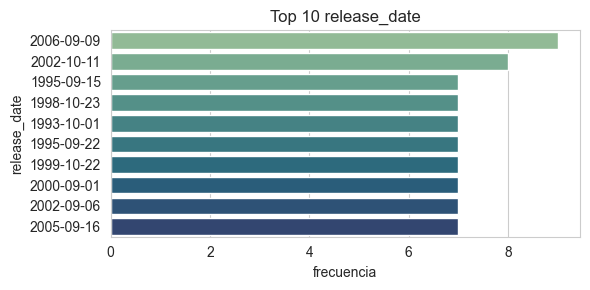


Top 10 en status


,count
status,
Released,9622


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


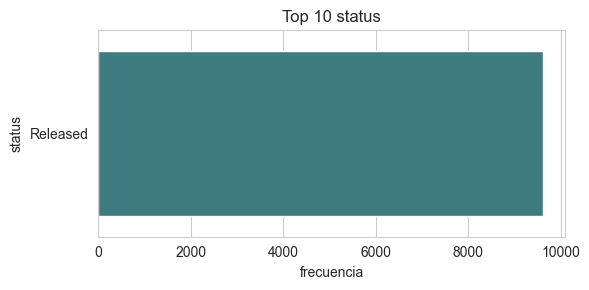


Top 10 en adult


,count
adult,
0,9622


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


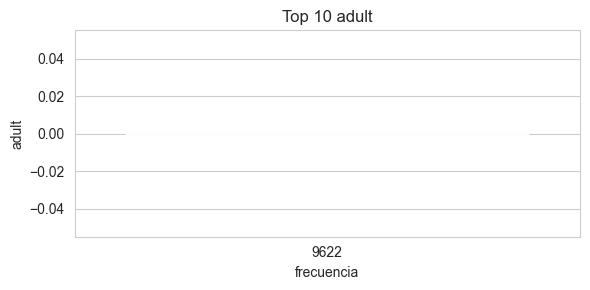


Top 10 en video


,count
video,
0,9610
1,12


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


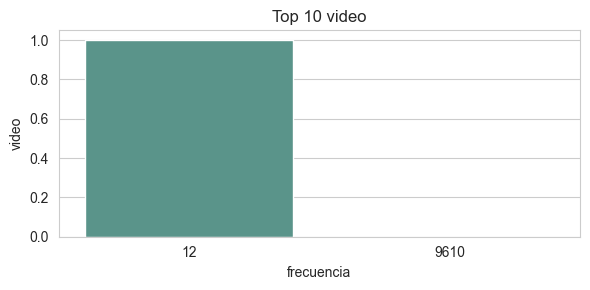


Top 10 en poster_path


,count
poster_path,
/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,1
/aUv1KxJwrdAY7ltJ38SvOWxI0n9.jpg,1
/rvcUVdATIHKZt7BSSttUkKbeBXN.jpg,1
/b5EtDvwj2gdG1qMBLijamlLfJLB.jpg,1
/lBMqdt52wgU9soSD9Asq1eNx6iX.jpg,1
/2aWGxo1E5polpBjPvtBRkWp7qaS.jpg,1
/3SX2UGSmAjIZsVACpshPpKtjbDr.jpg,1
/4rqLBoVBjqfIrk7QJcTF06Fn1Bd.jpg,1
/gAUAE1WiKjcbrPjpMc99MxBR3U2.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


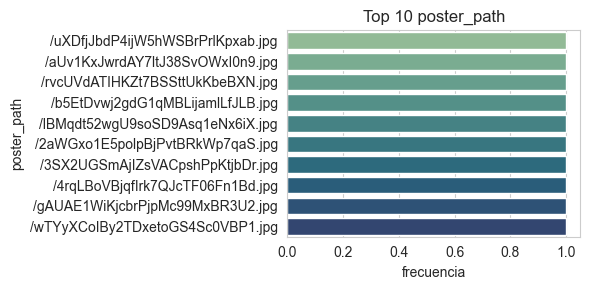


Top 10 en backdrop_path


,count
backdrop_path,
/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,1
/AkC9DX2t7zUFWj1VKVrxjq65HwF.jpg,1
/tuxPwQUg14iwoKBz58KRwqG8vU9.jpg,1
/ow1yVoMli073S1ALVinxrJkESa6.jpg,1
/1fRcgbdEpJFjudVq025i5e9pGzr.jpg,1
/es74vwJqbT6cwMdJmTeSIcjJjoo.jpg,1
/eGhjeUbzttA3E4flxdAm8gHz4h4.jpg,1
/plsdKhrNZ4vIN1qZJ8ccihiMZI7.jpg,1
/uXQxMjg57mGmXdFnAatnKFekdXk.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


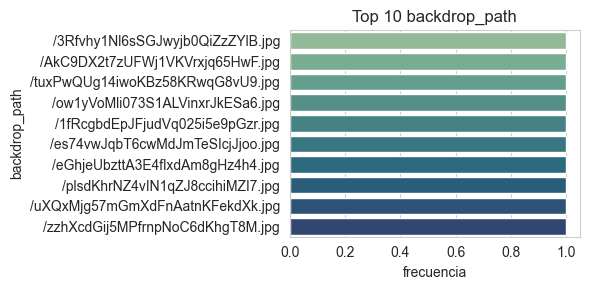


Top 10 en homepage


,count
homepage,
,6988
http://www.georgecarlin.com,5
http://www.troma.com,4
http://phantasm.com,4
http://www.thehungergames.movie/,4
https://www.koyaanisqatsi.org/,3
http://kizumonogatari-usa.com/,3
http://www.kungfupanda.com/,3
http://www.kiseiju.com/,2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


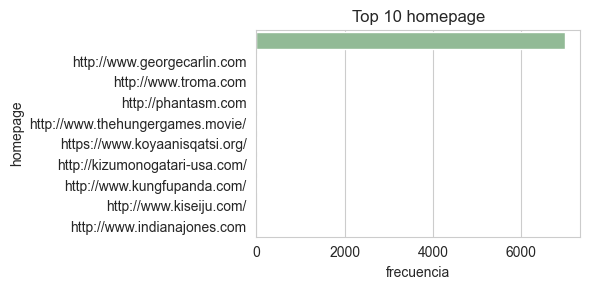


Top 10 en original_language


,count
original_language,
en,8188
fr,336
ja,260
it,139
ru,112
de,109
es,86
zh,67
cn,64


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


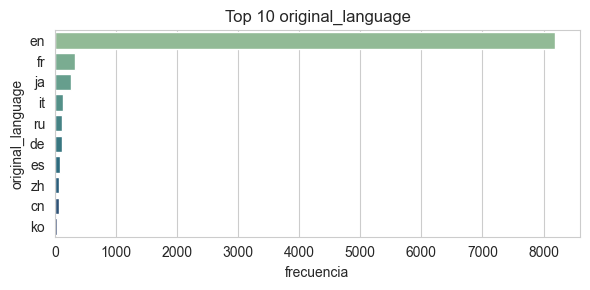

In [8]:
explore_table('movies')

### Explorar todas las tablas (opcional)
Descomenta la celda siguiente si quieres recorrer todas las tablas.


Tabla: movies


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,tmdb_id,INTEGER,0,None,0
2,2,imdb_id,TEXT,0,None,0
3,3,title,TEXT,0,None,0
4,4,original_title,TEXT,0,None,0
5,5,overview,TEXT,0,None,0
6,6,tagline,TEXT,0,None,0
7,7,release_date,TEXT,0,None,0
8,8,runtime,INTEGER,0,None,0
9,9,budget,INTEGER,0,None,0


,movie_id,tmdb_id,imdb_id,title,original_title,overview,tagline,release_date,runtime,budget,...,popularity,vote_average,vote_count,status,adult,video,poster_path,backdrop_path,homepage,original_language
0,1,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Hang on for the comedy that goes to infinity a...,1995-11-22,81,30000000,...,28.7831,7.967,18810,Released,0,0,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,http://toystory.disney.com/toy-story,en
1,2,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,1995-12-15,104,65000000,...,3.7123,7.236,10750,Released,0,0,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,/pb0FOvhen6lVcNJ7j9z61gnwvcI.jpg,http://www.sonypictures.com/movies/jumanji/,en
2,3,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,101,25000000,...,1.4725,6.465,396,Released,0,0,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,/nh9gYaXHTNT9yylX10L9aGqFehy.jpg,,en
3,4,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,1995-12-22,127,16000000,...,1.3688,6.263,173,Released,0,0,/qJU6rfil5xLVb5HpJsmmfeSK254.jpg,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,,en
4,5,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just when his world is back to normal... he's ...,1995-12-08,106,0,...,2.1545,6.200,751,Released,0,0,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,,en



Top 10 en imdb_id


,count
imdb_id,
,2
tt0114709,1
tt0445934,1
tt0475355,1
tt0822854,1
tt0800069,1
tt0453556,1
tt0389557,1
tt0427470,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


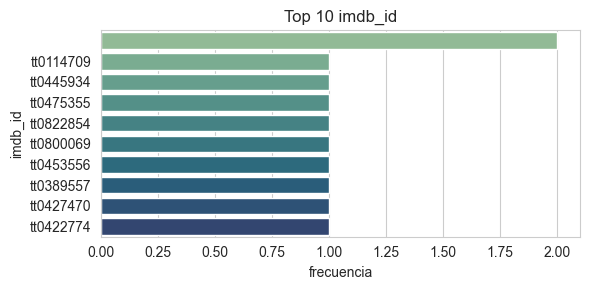


Top 10 en title


,count
title,
Jane Eyre,4
The Three Musketeers,4
A Christmas Carol,4
Hamlet,4
The Mummy,4
The Jungle Book,3
Dracula,3
Anna Karenina,3
Sisters,3


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


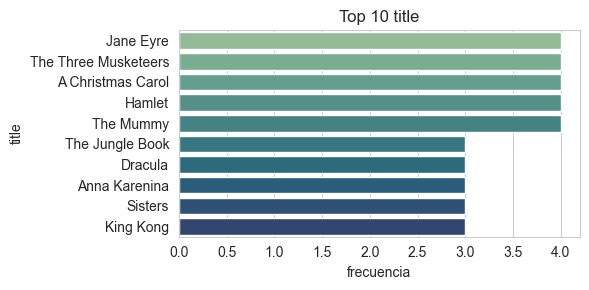


Top 10 en original_title


,count
original_title,
Jane Eyre,4
A Christmas Carol,4
The Mummy,4
The Three Musketeers,4
Hamlet,4
Little Women,3
Carrie,3
A Midsummer Night's Dream,3
Les Misérables,3


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


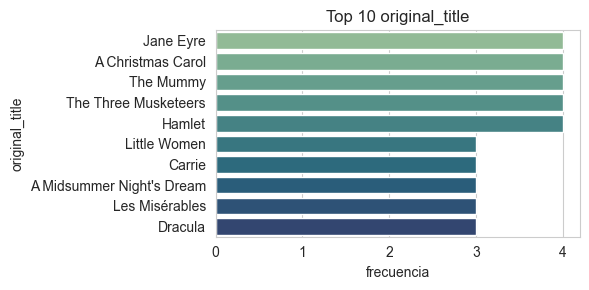


Top 10 en overview


,count
overview,
,5
"After a bleak childhood, Jane Eyre goes out into the world to become a governess. As she lives happily in her new position at Thornfield Hall, she meet the dark, cold, and abrupt master of the house, Mr. Rochester. Jane and her employer grow close in friendship and she soon finds herself falling in love with him. Happiness seems to have found Jane at last, but could Mr. Rochester's terrible secret be about to destroy it forever?",4
"Miser Ebenezer Scrooge is awakened on Christmas Eve by spirits who reveal to him his own miserable existence, what opportunities he wasted in his youth, his current cruelties, and the dire fate that awaits him if he does not change his ways. Scrooge is faced with his own story of growing bitterness and meanness, and must decide what his own future will hold: death or redemption.",4
"Widowed Welsh mother Anna Loenowens becomes a governess and English tutor to the wives and many children of the stubborn King Mongkut of Siam. Anna and the King have a clash of personalities as she works to teach the royal family about the English language, customs and etiquette, and rushes to prepare a party for a group of European diplomats who must change their opinions about the King.",2
"In a woods filled with magic and fairy tale characters, a baker and his wife set out to end the curse put on them by their neighbor, a spiteful witch.",2
"Broadway producer Max Bialystock and his accountant, Leo Bloom plan to make money by charming wealthy old biddies to invest in a production many times over the actual cost, and then put on a sure-fire flop, so nobody will ask for their money back – and what can be a more certain flop than a tasteless musical celebrating Hitler.",2
"Humbert Humbert is a middle-aged British novelist who is both appalled by and attracted to the vulgarity of American culture. When he comes to stay at the boarding house run by Charlotte Haze, he soon becomes obsessed with Lolita, the woman's teenaged daughter.",2
Director Michael Apted revisits the same group of British-born adults after a 7 year wait. The subjects are interviewed as to the changes that have occurred in their lives during the last seven years.,2
"Wilbur the pig is scared of the end of the season, because he knows that come that time, he will end up on the dinner table. He hatches a plan with Charlotte, a spider that lives in his pen, to ensure that this will never happen.",2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')
C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


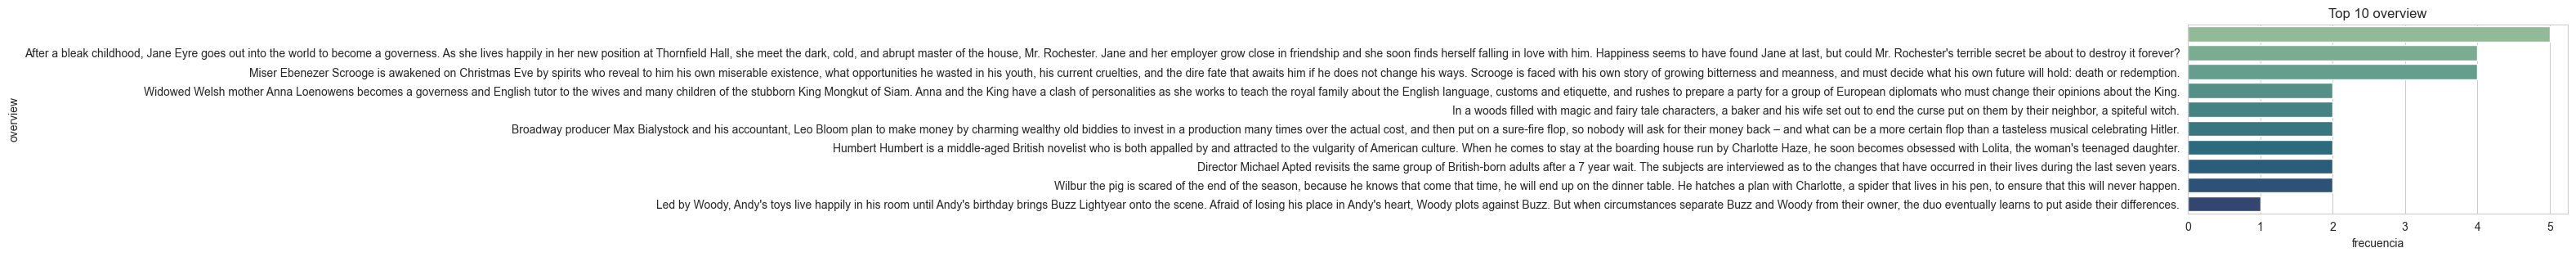


Top 10 en tagline


,count
tagline,
,1321
Based on a true story.,4
Be careful what you wish for.,3
A comedy to arouse your appetite.,2
Touched by Genius. Cursed by Madness. Blinded by Love.,2
What could go wrong?,2
Heaven help us.,2
This time it's war.,2
It could happen to you.,2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


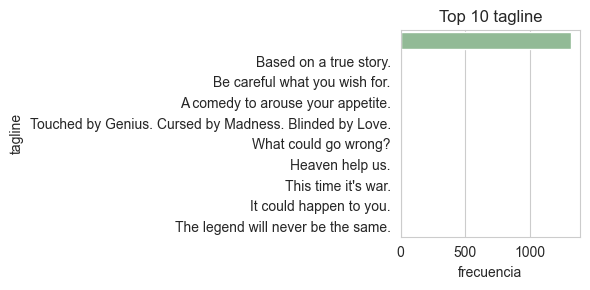


Top 10 en release_date


,count
release_date,
2006-09-09,9
2002-10-11,8
1995-09-15,7
1998-10-23,7
1993-10-01,7
1995-09-22,7
1999-10-22,7
2000-09-01,7
2002-09-06,7


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


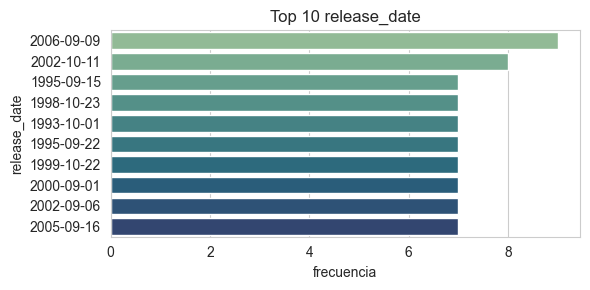


Top 10 en status


,count
status,
Released,9622


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


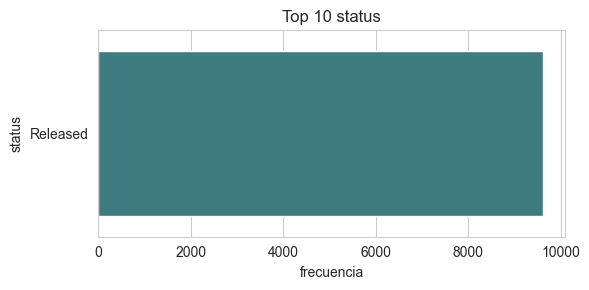


Top 10 en adult


,count
adult,
0,9622


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


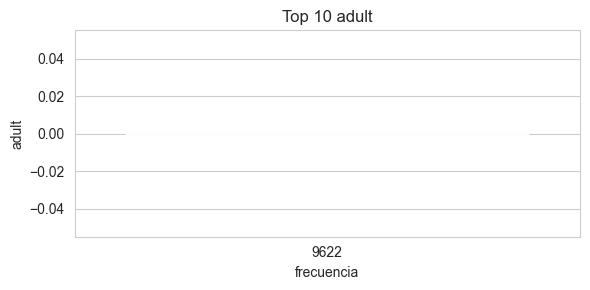


Top 10 en video


,count
video,
0,9610
1,12


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


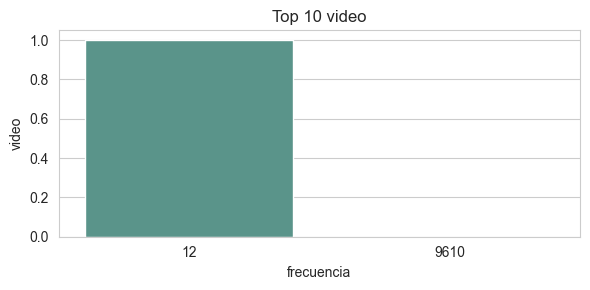


Top 10 en poster_path


,count
poster_path,
/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,1
/aUv1KxJwrdAY7ltJ38SvOWxI0n9.jpg,1
/rvcUVdATIHKZt7BSSttUkKbeBXN.jpg,1
/b5EtDvwj2gdG1qMBLijamlLfJLB.jpg,1
/lBMqdt52wgU9soSD9Asq1eNx6iX.jpg,1
/2aWGxo1E5polpBjPvtBRkWp7qaS.jpg,1
/3SX2UGSmAjIZsVACpshPpKtjbDr.jpg,1
/4rqLBoVBjqfIrk7QJcTF06Fn1Bd.jpg,1
/gAUAE1WiKjcbrPjpMc99MxBR3U2.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


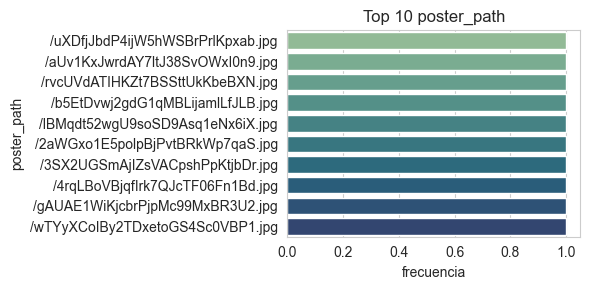


Top 10 en backdrop_path


,count
backdrop_path,
/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,1
/AkC9DX2t7zUFWj1VKVrxjq65HwF.jpg,1
/tuxPwQUg14iwoKBz58KRwqG8vU9.jpg,1
/ow1yVoMli073S1ALVinxrJkESa6.jpg,1
/1fRcgbdEpJFjudVq025i5e9pGzr.jpg,1
/es74vwJqbT6cwMdJmTeSIcjJjoo.jpg,1
/eGhjeUbzttA3E4flxdAm8gHz4h4.jpg,1
/plsdKhrNZ4vIN1qZJ8ccihiMZI7.jpg,1
/uXQxMjg57mGmXdFnAatnKFekdXk.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


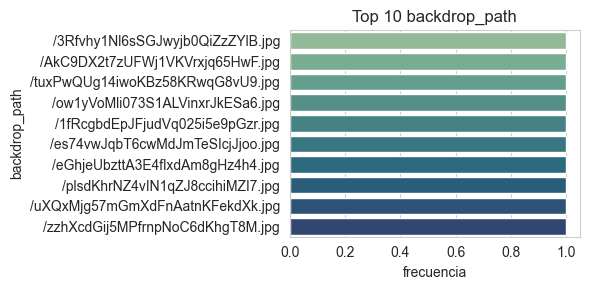


Top 10 en homepage


,count
homepage,
,6988
http://www.georgecarlin.com,5
http://www.troma.com,4
http://phantasm.com,4
http://www.thehungergames.movie/,4
https://www.koyaanisqatsi.org/,3
http://kizumonogatari-usa.com/,3
http://www.kungfupanda.com/,3
http://www.kiseiju.com/,2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


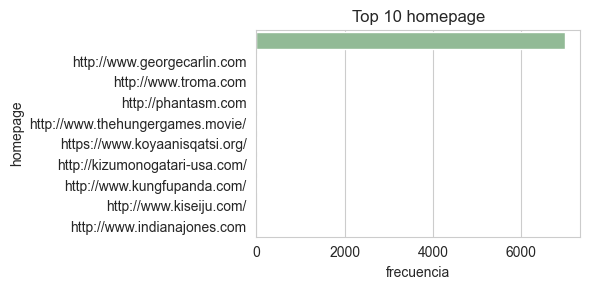


Top 10 en original_language


,count
original_language,
en,8188
fr,336
ja,260
it,139
ru,112
de,109
es,86
zh,67
cn,64


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


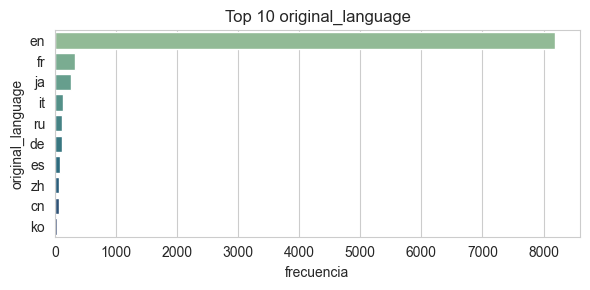


Tabla: genres


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0


,id,name
0,12,Adventure
1,14,Fantasy
2,16,Animation
3,18,Drama
4,27,Horror



Top 10 en id


,count
id,
12,1
80,1
10752,1
10751,1
10749,1
10402,1
9648,1
878,1
99,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


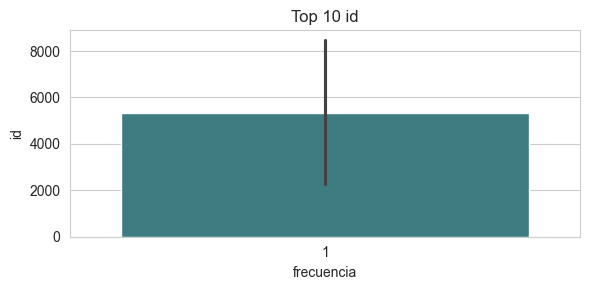


Top 10 en name


,count
name,
Adventure,1
Crime,1
War,1
Family,1
Romance,1
Music,1
Mystery,1
Science Fiction,1
Documentary,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


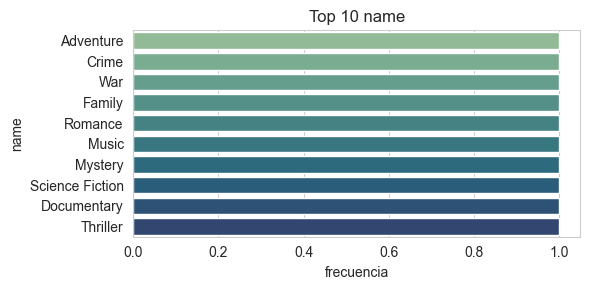


Tabla: movie_genres


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,genre_id,INTEGER,0,None,2


,movie_id,genre_id
0,1,16
1,1,12
2,1,10751
3,1,35
4,2,12



Top 10 en genre_id


,count
genre_id,
18,4532
35,3935
53,2034
10749,1977
28,1936
80,1487
12,1406
878,1058
27,1032


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


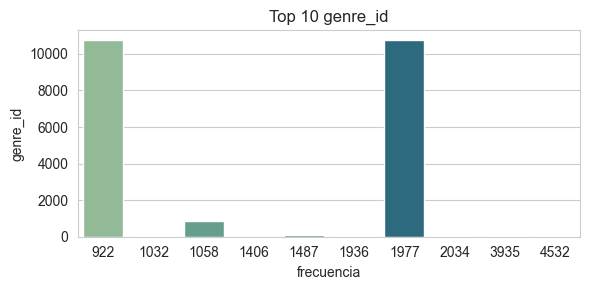


Tabla: production_companies


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0
2,2,logo_path,TEXT,0,None,0
3,3,origin_country,TEXT,0,None,0


,id,name,logo_path,origin_country
0,1,Lucasfilm Ltd.,/tlVSws0RvvtPBwViUyOFAO0vcQS.png,US
1,2,Walt Disney Pictures,/wdrCwmRnLFJhEoH8GSfymY85KHT.png,US
2,3,Pixar,/1TjvGVDMYsj6JBxOAkUHpPEwLf7.png,US
3,4,Paramount Pictures,/gz66EfNoYPqHTYI4q9UEN4CbHRc.png,US
4,5,Columbia Pictures,/71BqEFAF4V3qjjMPCpLuyJFB9A.png,US



Top 10 en name


,count
name,
Initial Productions,3
CBC,2
Norma Productions,2
Grosvenor Park Productions,2
Momentum Pictures,2
TV 2,2
Intermedia,2
Blue Tulip Productions,2
Pariah,2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


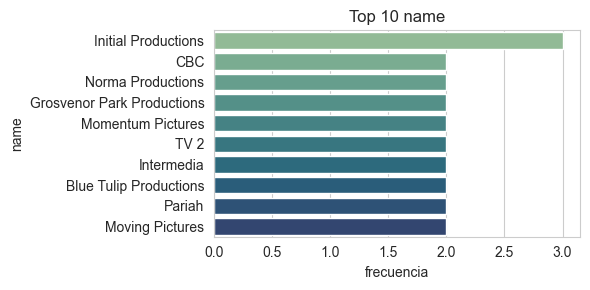


Top 10 en logo_path


,count
logo_path,
/j7grgeyXof8VBmqbBBSNaqVoOCb.png,4
/caz3eGyRd4OW7oR31Aij5ZwjOXD.png,2
/6Ry6uNBaa0IbbSs1XYIgX5DkA9r.png,2
/qZCc1lty5FzX30aOCVRBLzaVmcp.png,2
/rGxYK3422RKLRBWQoWKJxRdD2Jp.png,2
/rxO73jR41tGlohvPGMC3sJeclcf.png,2
/8qh5BEyKYOQ0e81LPbvWHQvyOy5.png,2
/6UIpEURdjnmcJPwgTDRzVRuwADr.png,2
/dVMf5qfBDzhYioWkUD6UysKiS8y.png,2


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


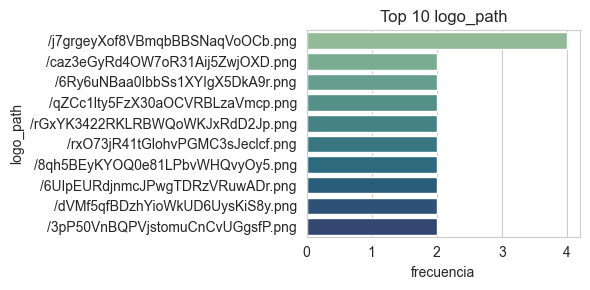


Top 10 en origin_country


,count
origin_country,
,3975
US,2100
GB,501
FR,415
JP,291
DE,250
CA,188
IT,188
ES,111


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


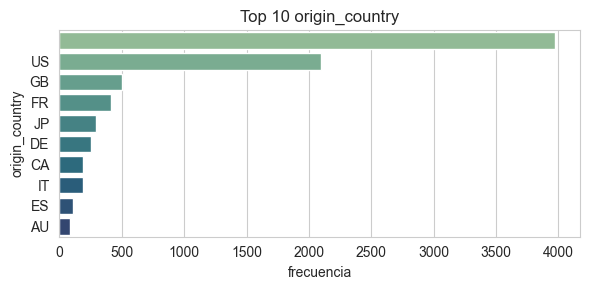


Tabla: movie_production_companies


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,company_id,INTEGER,0,None,2


,movie_id,company_id
0,1,3
1,2,559
2,2,10201
3,2,2550
4,2,1382



Tabla: production_countries


,cid,name,type,notnull,dflt_value,pk
0,0,iso_3166_1,TEXT,0,None,1
1,1,name,TEXT,0,None,0


,iso_3166_1,name
0,SN,Senegal
1,BW,Botswana
2,CU,Cuba
3,LB,Lebanon
4,CS,Serbia and Montenegro



Top 10 en iso_3166_1


,count
iso_3166_1,
SN,1
RS,1
DK,1
IN,1
NO,1
EG,1
RU,1
GR,1
CL,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


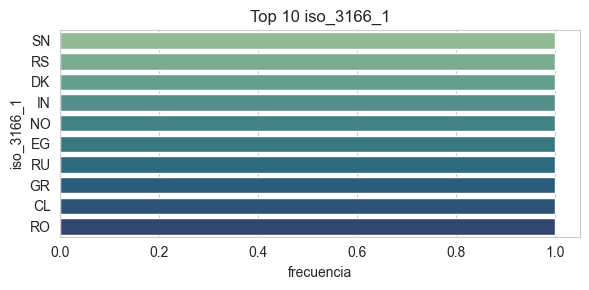


Top 10 en name


,count
name,
Senegal,1
Serbia,1
Denmark,1
India,1
Norway,1
Egypt,1
Russia,1
Greece,1
Chile,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


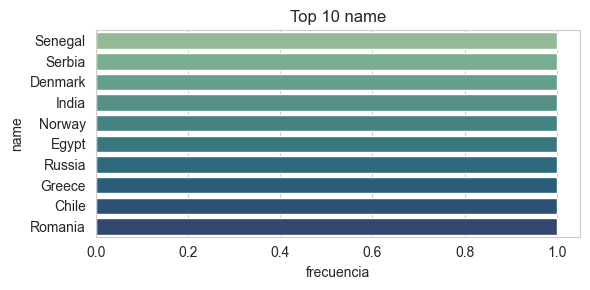


Tabla: movie_production_countries


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,country_code,TEXT,0,None,2


,movie_id,country_code
0,1,US
1,2,US
2,3,US
3,4,US
4,5,US



Top 10 en country_code


,count
country_code,
US,7346
GB,1430
FR,875
DE,608
CA,454
JP,376
IT,332
AU,171
ES,160


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


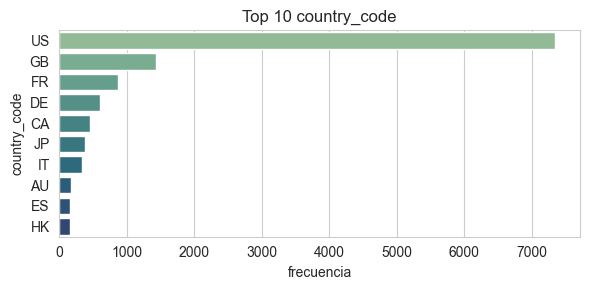


Tabla: spoken_languages


,cid,name,type,notnull,dflt_value,pk
0,0,iso_639_1,TEXT,0,None,1
1,1,name,TEXT,0,None,0
2,2,english_name,TEXT,0,None,0


,iso_639_1,name,english_name
0,lv,Latviešu,Latvian
1,ne,,Nepali
2,ty,,Tahitian
3,vo,,Volapük
4,si,සිංහල,Sinhalese



Top 10 en iso_639_1


,count
iso_639_1,
lv,1
sa,1
uk,1
ur,1
vi,1
he,1
ln,1
bn,1
ro,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


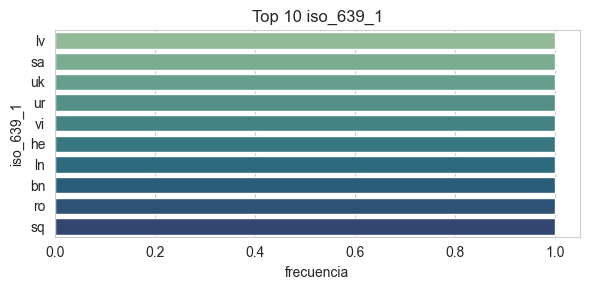


Top 10 en name


,count
name,
,43
Latviešu,1
한국어/조선말,1
ქართული,1
No Language,1
Český,1
پښتو,1
Dansk,1
Polski,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')
C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:21: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:21: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()
C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:21: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:21: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  plt.tight_layout()
C:\User

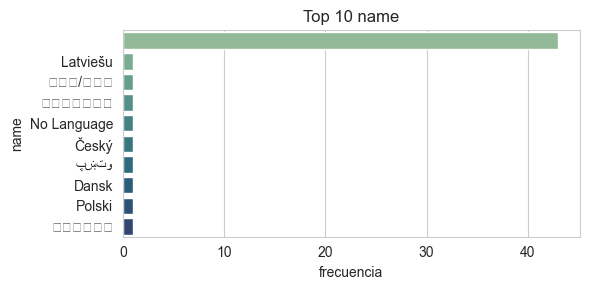


Top 10 en english_name


,count
english_name,
Latvian,1
Sanskrit,1
Ukrainian,1
Urdu,1
Vietnamese,1
Hebrew,1
Lingala,1
Bengali,1
Romanian,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


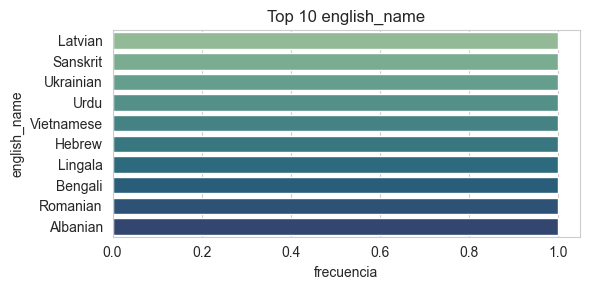


Tabla: movie_spoken_languages


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,language_code,TEXT,0,None,2


,movie_id,language_code
0,1,en
1,2,en
2,2,fr
3,3,en
4,4,en



Top 10 en language_code


,count
language_code,
en,8476
fr,1013
es,781
de,561
it,536
ja,436
ru,392
zh,214
cn,140


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


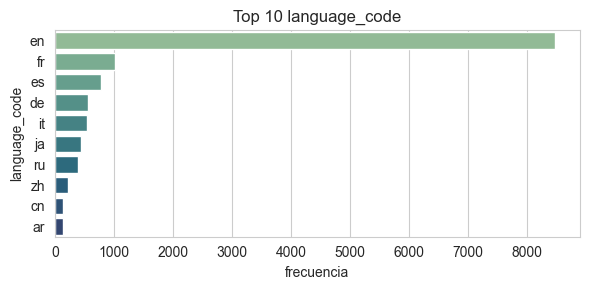


Tabla: collections


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0
2,2,poster_path,TEXT,0,None,0
3,3,backdrop_path,TEXT,0,None,0


,id,name,poster_path,backdrop_path
0,10,Star Wars Collection,/aSrMJYmQX8kpF26LijkCsYhBMvm.jpg,/zZDkgOmFMVYpGAkR9Tkxw0CRnxX.jpg
1,84,Indiana Jones Collection,/yJgGZ8YtSIUuTIwYBCs1TjcVrg4.jpg,/6kh59mZizZsttZPR0HAdXk6Ve2n.jpg
2,119,The Lord of the Rings Collection,/44BCXU0RfYNBSsbWHvtC4kZMHyk.jpg,/bccR2CGTWVVSZAG0yqmy3DIvhTX.jpg
3,131,Three Colors Collection,/38JAJC57AbeqqwWj3D3Ltpql2mG.jpg,/AeHExfHIl70SZCea907KfEoSkfJ.jpg
4,151,Star Trek: The Original Series Collection,/vNrbrsHOpXS3whk9DLuBNcjJy1s.jpg,/qM8q2gWAeQF0XUpZ4XZc4CMX87a.jpg



Top 10 en name


,count
name,
Star Wars Collection,1
On Any Sunday Collection,1
The Amityville Collection,1
Kindergarten Cop Collection,1
The Snowman Collection,1
McHale's Navy Collection,1
The Huntsman Collection,1
Kingsman Collection,1
Gone in 60 Seconds Trilogy,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


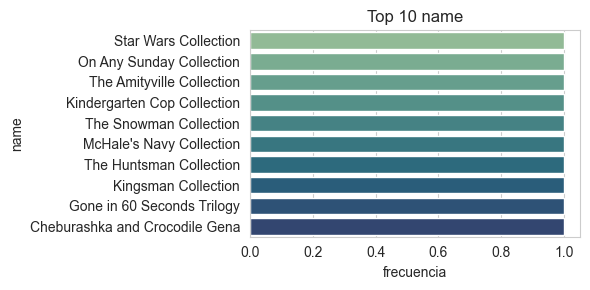


Top 10 en poster_path


,count
poster_path,
/aSrMJYmQX8kpF26LijkCsYhBMvm.jpg,1
/zCFM4QKS8gr3e9lQ2rpjyzGuS1U.jpg,1
/noBsTnvxo1G4DVd36kaKSbTtM1M.jpg,1
/wGiAm95GjmBXiJoGm91irvibfrt.jpg,1
/8sdbsRPZqxrUkFzpuZlCNyHSmTU.jpg,1
/n2B51uCX5r960pFbEl9jMbTMuvq.jpg,1
/43dxfJxxYAxlhVAIADKzWsnNl3Z.jpg,1
/1zKzkD1sGm58KKAH3QLHGLiN3GY.jpg,1
/r43BDC7vFi6TvZelH3Tg2grrUA.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


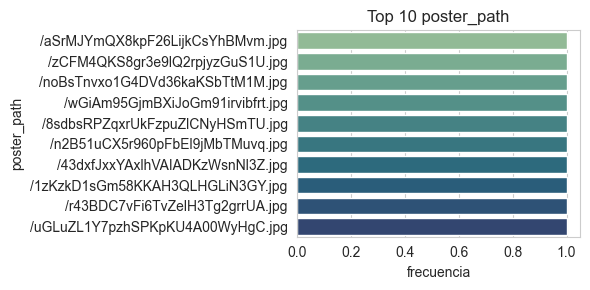


Top 10 en backdrop_path


,count
backdrop_path,
/zZDkgOmFMVYpGAkR9Tkxw0CRnxX.jpg,1
/1gTLyR2zGYhbeJ9rfsJBu8MJQ3o.jpg,1
/noeTVcgpBiD48fDjFVic1Vz7ope.jpg,1
/hsaF8jlRaSUah3kpj8A05GyH7Ja.jpg,1
/5jfqMomBuXSwawPy4eZeHfYsWad.jpg,1
/6UeHhbszPiAWDX1gXJOrG4VZ85B.jpg,1
/vAyMNou7M2SOXjPIzLhltTvAqD1.jpg,1
/an2ceogCMamhYxluJFGcDSedAbu.jpg,1
/jRcdy7G3DVhquLuEPusC9vtscHQ.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


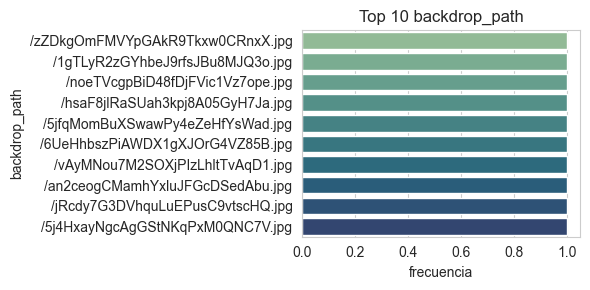


Tabla: movie_collections


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,collection_id,INTEGER,0,None,2


,movie_id,collection_id
0,1,10194
1,2,495527
2,3,119050
3,5,96871
4,6,1048282



Tabla: people


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,1,None,0
2,2,original_name,TEXT,0,None,0
3,3,gender,INTEGER,0,None,0
4,4,popularity,REAL,0,None,0
5,5,profile_path,TEXT,0,None,0
6,6,known_for_department,TEXT,0,None,0


,id,name,original_name,gender,popularity,profile_path,known_for_department
0,1,George Lucas,George Lucas,2,4.3545,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg,Directing
1,2,Mark Hamill,Mark Hamill,2,6.4029,/2ZulC2Ccq1yv3pemusks6Zlfy2s.jpg,Acting
2,3,Harrison Ford,Harrison Ford,2,7.8695,/zVnHagUvXkR2StdOtquEwsiwSVt.jpg,Acting
3,4,Carrie Fisher,Carrie Fisher,1,4.7037,/awb4UqzT6meD3JiQlraIzAqcRtH.jpg,Acting
4,5,Peter Cushing,Peter Cushing,2,2.7032,/if5g03wn6uvHx7F6FxXHLebKc0q.jpg,Acting



Top 10 en name


,count
name,
Colin Campbell,7
David Williams,6
Michael Davis,6
Chris Barnes,6
David James,6
John Thompson,5
Bill Miller,5
Matt Smith,5
Mark Williams,5


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


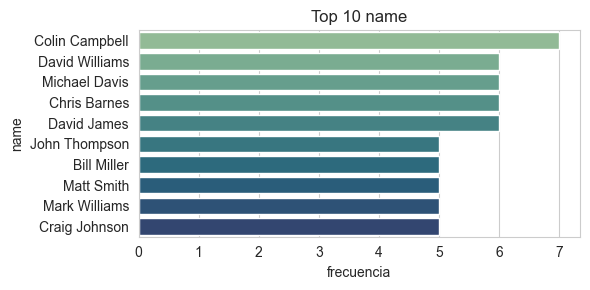


Top 10 en original_name


,count
original_name,
Colin Campbell,7
Chris Barnes,6
Michael Davis,6
David James,6
David Williams,6
Richard Williams,5
John Williams,5
John Thompson,5
James Young,5


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


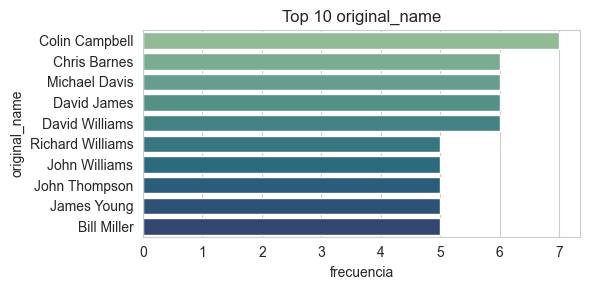


Top 10 en gender


,count
gender,
0,71600
2,70202
1,38018
3,66


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


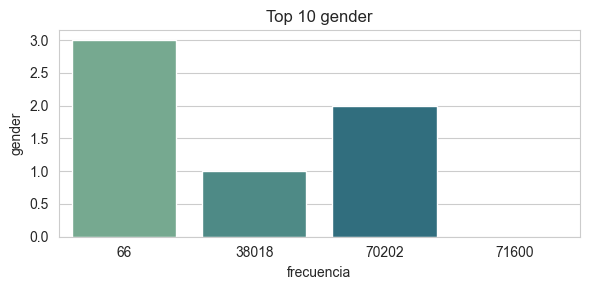


Top 10 en profile_path


,count
profile_path,
/vchaFlGeZ6WgD3YFM5X5N4NrMdu.jpg,2
/mRGxpUuVrO9Xs0DHtS9cxmioS5Y.jpg,2
/7UF8LSUIHoiNdgw67DLiIbuxRhe.jpg,1
/a8LdstM4zzJwM2wXdmC6FU2oz7s.jpg,1
/5Qub7EOI1EuGv60LeVW6kEeITmB.jpg,1
/8Zw94WJKiBe9RP1HOaWRigYoqOq.jpg,1
/iSZy6QCYKepsrD3RfmevOgNakNe.jpg,1
/prKzxaBNCNQp5LHqLFJpyF0Xvke.jpg,1
/dCD9EPkkq62i7JcL4qFMNTY8fvX.jpg,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


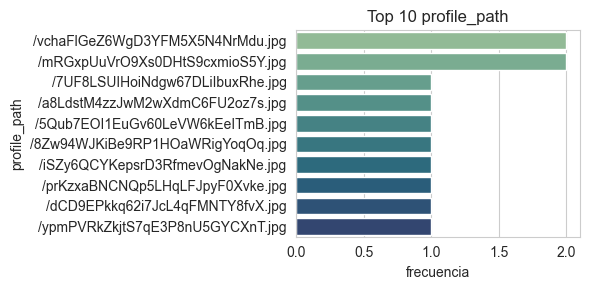


Top 10 en known_for_department


,count
known_for_department,
Acting,159490
Production,7793
Directing,4778
Writing,2591
Crew,2417
Sound,741
Art,502
Camera,489
Costume & Make-Up,382


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


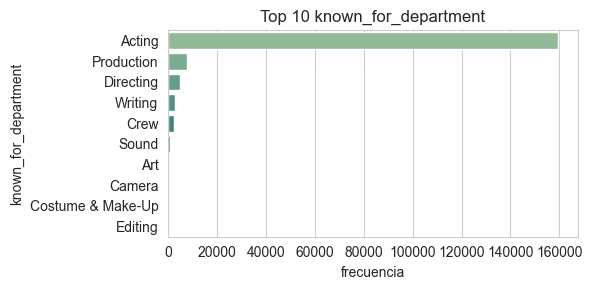


Tabla: movie_cast


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,person_id,INTEGER,0,None,2
2,2,character,TEXT,0,None,0
3,3,credit_id,TEXT,0,None,3
4,4,cast_order,INTEGER,0,None,0


,movie_id,person_id,character,credit_id,cast_order
0,4470,54768,Taisto Kasurinen,52fe420dc3a36847f8000029,0
1,4470,54769,Irmeli Pihlaja,52fe420dc3a36847f800002d,1
2,4470,4826,Mikkonen,52fe420dc3a36847f8000031,2
3,4470,54770,Riku,52fe420dc3a36847f8000035,3
4,4470,1177496,Miner,5e1cda97d5dbc20017f439bb,4



Top 10 en character


,count
character,
,3838
Self,3562
Additional Voices (voice),2030
Dancer,1473
Himself,814
(uncredited),700
Reporter,667
Self (archive footage),597
Nurse,593


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


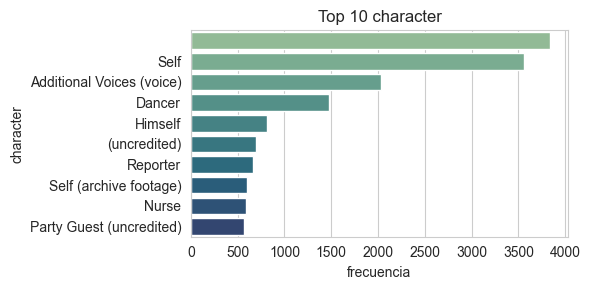


Top 10 en credit_id


,count
credit_id,
52fe420dc3a36847f8000029,1
5f68bb85a0b690003846ebf3,1
5f89ade6e9da690039e6a687,1
5b261e7e9251410d4700c085,1
52fe4528c3a368484e04b9b5,1
5f68bbb4fbe36f0039412c28,1
52fe4528c3a368484e04b9a5,1
5f68bbabdbcade003631190d,1
52fe4528c3a368484e04b9bd,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


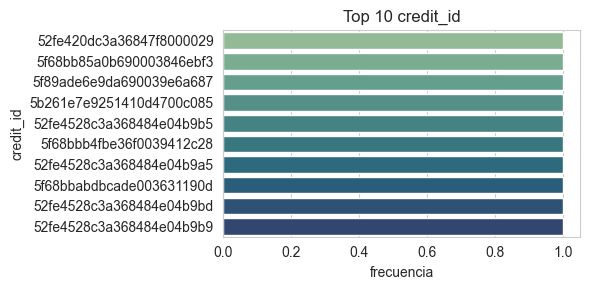


Tabla: movie_crew


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,person_id,INTEGER,0,None,2
2,2,department,TEXT,0,None,0
3,3,job,TEXT,0,None,0
4,4,credit_id,TEXT,0,None,3


,movie_id,person_id,department,job,credit_id
0,4470,16767,Directing,Director,52fe420dc3a36847f8000025
1,4470,16767,Production,Producer,5be040dac3a3682b34043d42
2,18,3110,Directing,Director,52fe420dc3a36847f800012d
3,18,3111,Directing,Director,52fe420dc3a36847f8000133
4,18,138,Directing,Director,52fe420dc3a36847f800013f



Top 10 en department


,count
department,
Production,20689
Directing,10504


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


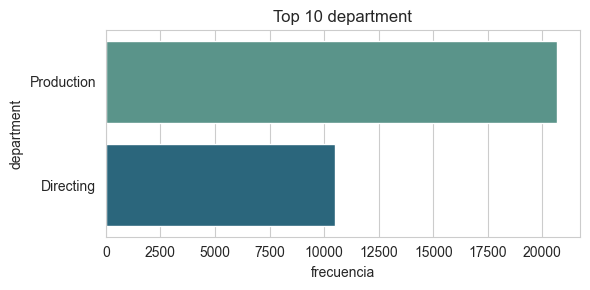


Top 10 en job


,count
job,
Producer,20689
Director,10504


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


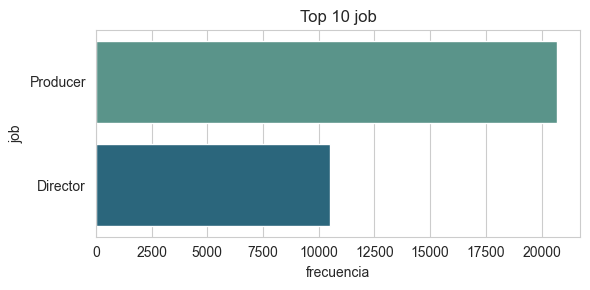


Top 10 en credit_id


,count
credit_id,
52fe420dc3a36847f8000025,1
52fe45389251416c9102b673,1
52fe454a9251416c9102d41b,1
52fe454a9251416c9102d415,1
620d865eb865eb0042e155fa,1
56daea85c3a3684ca800226b,1
52fe45489251416c9102cf59,1
5b4211579251414f4f012eaf,1
5b42114b9251414f4f012ea9,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


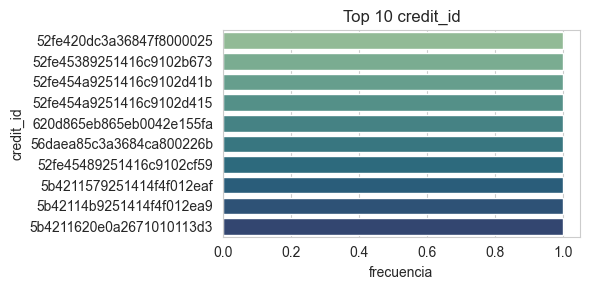


Tabla: users


,cid,name,type,notnull,dflt_value,pk
0,0,userId,INTEGER,0,None,0
1,1,username,TEXT,0,None,0
2,2,firstName,TEXT,0,None,0
3,3,lastName,TEXT,0,None,0
4,4,email,TEXT,0,None,0
5,5,passwordHash,TEXT,0,None,0
6,6,password,TEXT,0,None,0
7,7,preferred_genres,TEXT,0,None,0
8,8,age,INTEGER,0,None,0
9,9,occupation,TEXT,0,None,0


,userId,username,firstName,lastName,email,passwordHash,password,preferred_genres,age,occupation
0,1,tammygardner947,Tammy,Gardner,tammygardner947@example.com,1a4b62abe3774a09abd56bb5054a60110fb490f9c95011...,$2b$12$CaCQtDy3zZb/PtTrqT5e3exbQTrMYuTIq7GWYpl...,Action|Adventure|Comedy,18,marketing
1,2,jasonadams218,Jason,Adams,jasonadams218@example.com,7e2e1ea858d7de3b1ba729f0364647ee9c6e2e1c39e88c...,$2b$12$eBul5pUtSKFlJZ1/jP15jeXqNuz0wfDjVb2x/TM...,Drama|Action|Crime,18,executive
2,3,zacharybeasley216,Zachary,Beasley,zacharybeasley216@example.com,b1be9b3c57a36ffd9044a3ca21bc10e15e8c06ead7d55c...,$2b$12$GLNrjcZl358nUK0Kh0hwG.rQeLxsI.4S0UhfYj1...,Sci-Fi|Action|Horror,18,writer
3,4,marialopez407,Maria,Lopez,marialopez407@example.com,05ebd37d48afed8c137f7c2ff7db6acfddc74a65a40b1b...,$2b$12$TkyxgeGL/0BSKwqmVt2iPuxInkHTMo3aM.723qX...,Drama|Comedy|Romance,42,other
4,5,ericzamora800,Eric,Zamora,ericzamora800@example.com,f2f850b81914146a88b8bec011b825e7230f4fcb84d28d...,$2b$12$H3fCpWlzgRQjKwFqE9g8K.TetypOzJCHdHj8BUH...,Drama|Comedy|Crime,33,doctor



Top 10 en username


,count
username,
tammygardner947,1
kathrynblack64,1
davidbriggs416,1
juliehiggins21,1
tinabush600,1
michellegriffith667,1
pamelawallace742,1
brittanyray939,1
alexmiddleton15,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


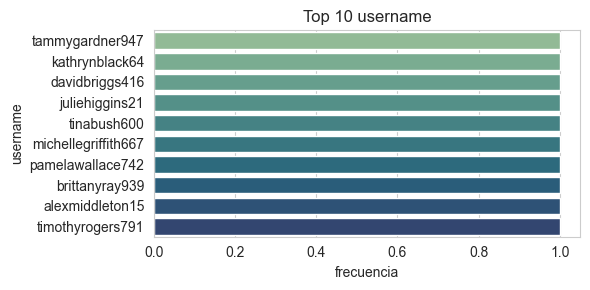


Top 10 en firstName


,count
firstName,
Michael,14
John,14
David,11
James,11
Robert,11
Elizabeth,9
Joseph,9
Daniel,9
Christopher,9


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


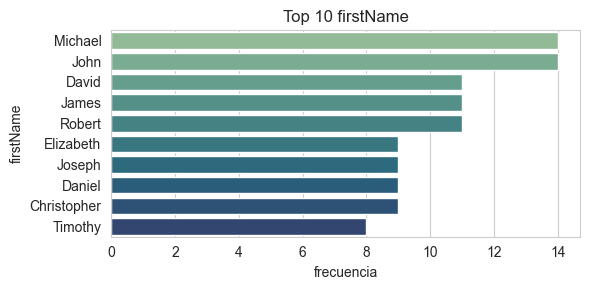


Top 10 en lastName


,count
lastName,
Jones,11
Johnson,11
Brown,8
Smith,8
Taylor,7
Walker,6
Martin,6
Miller,6
Collins,5


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


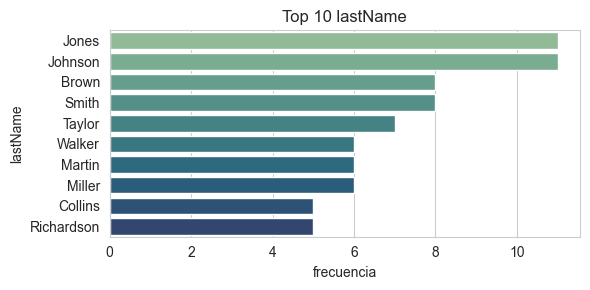


Top 10 en email


,count
email,
tammygardner947@example.com,1
kathrynblack64@example.com,1
davidbriggs416@example.com,1
juliehiggins21@example.com,1
tinabush600@example.com,1
michellegriffith667@example.com,1
pamelawallace742@example.com,1
brittanyray939@example.com,1
alexmiddleton15@example.com,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


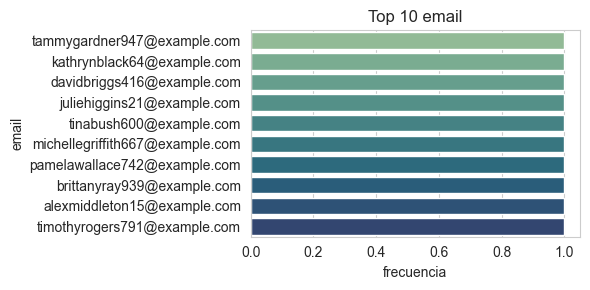


Top 10 en passwordHash


,count
passwordHash,
1a4b62abe3774a09abd56bb5054a60110fb490f9c95011ee5287a9187bfc4b92,1
ee18d405e71aa943c0b0be685fb97c96ed77727c49b251932227fefb0501aa5b,1
0c91c84584cd16cd581d25ad518f9b9608aa0005b161b36016a29fd7fced8dc5,1
dfe82f952b8770ef026f78f2e1db0bd67d01061e4fc88f2692b3026cd2dc6a0a,1
da94fc0afc1e849ce35e67e85929b07c7d5ab00be26ea88875524008d81a293a,1
2d1cd02c524df1baa7a88dc86bf2ce3bba8c2f51602497de056538976134906c,1
451fd64181260820e4591fe783aa11b6b3d8b911f547d94ae5b7d3ce050126f8,1
1c9816e92d69d9fb1d7dc4f5016152895674feeaeb4f07129b29db6fa27096d3,1
4eec187438e3c0f08a26d4665c1a6f7f7fea6d5a2902f5ccd87004ceb6ece6fe,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


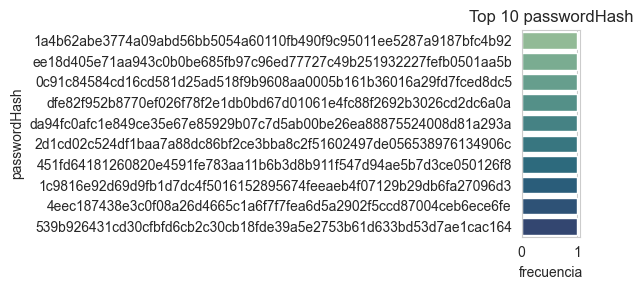


Top 10 en password


,count
password,
$2b$12$CaCQtDy3zZb/PtTrqT5e3exbQTrMYuTIq7GWYplmiSJemNUpNNqd2,1
$2b$12$chd64f7HjF5YFh2CNGecOOcHIc2SmTbTTHNoa05/JCm56G40Ki.se,1
$2b$12$WJ1xTbhLCxmxj7/kyBThnubJQsHxh2EBp6LQVbdM9NmBBfflQEzfa,1
$2b$12$meFoovl/.5tjJQ4NOiUCI.TXRYJYTo3cmCuLTrkk6Go/MQJJaVbLu,1
$2b$12$f0reJ3iw3lcqykPxz9d0Zuf9As1Yn8l05QpPgt986qgBp.xXYyY..,1
$2b$12$6kVJ53ixYAJn0yzUN961TOHD5iwgqTNpDjhu/RxAHwV9Q8QzMRRkK,1
$2b$12$C8cquPA4kP5if5UEt/FRmu6jqr4YVM/7dyO6.0Ax2.4ZD/qx2XaU2,1
$2b$12$KwFID4ZDZy2pA82uzPlRweZR3Mb9PpdlVioD8GlQAJKuYAAhJ1BIO,1
$2b$12$MvkAls7tWDgpZgsQVtj09OuZlO9rEtC/jDEFOKRptyZnSHsa5I0p.,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


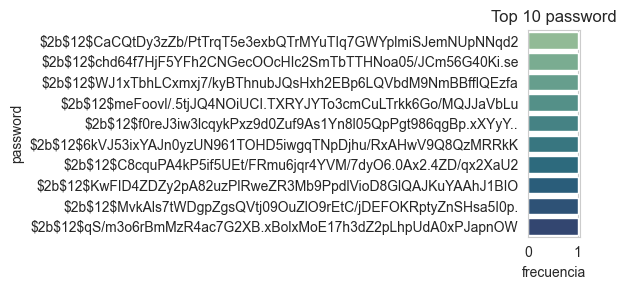


Top 10 en preferred_genres


,count
preferred_genres,
Drama|Comedy|Romance,48
Drama|Comedy|Action,28
Drama|Thriller|Action,27
Drama|Comedy|Thriller,26
Comedy|Drama|Romance,23
Drama|Action|Thriller,23
Drama|Thriller|Comedy,23
Comedy|Drama|Action,20
Drama|Thriller|Crime,18


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


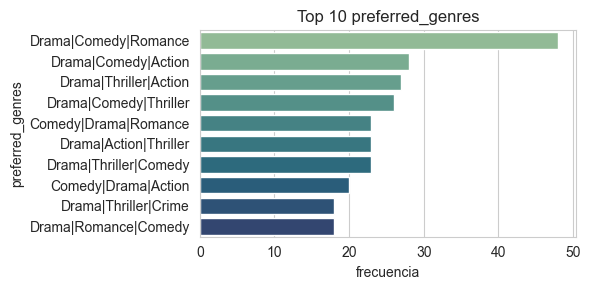


Top 10 en occupation


,count
occupation,
retired,41
lawyer,39
writer,37
salesman,35
entertainment,35
artist,34
administrator,34
marketing,33
student,31


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


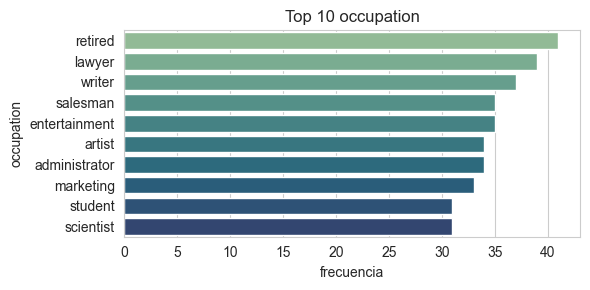


Tabla: user_genres


,cid,name,type,notnull,dflt_value,pk
0,0,user_id,INTEGER,0,None,1
1,1,genre_id,INTEGER,0,None,2


,user_id,genre_id
0,1,28
1,1,12
2,1,35
3,2,18
4,2,28



Top 10 en genre_id


,count
genre_id,
18,479
35,366
28,322
53,244
12,169
10749,110
80,61
878,42
10751,13


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


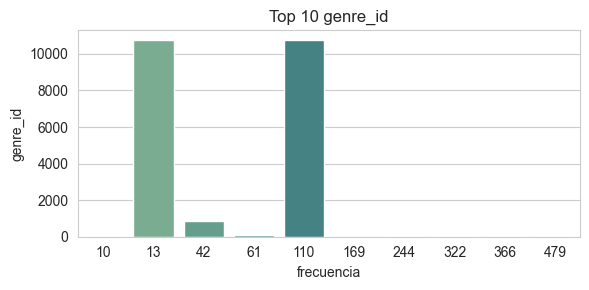


Tabla: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,user_id,INTEGER,0,None,1
1,1,movie_id,INTEGER,0,None,2
2,2,rating,REAL,0,None,0
3,3,timestamp,INTEGER,0,None,0
4,4,description,TEXT,0,None,0


,user_id,movie_id,rating,timestamp,description
0,1,1,4.0,964982703,Muy buena película
1,1,3,4.0,964981247,Me gustó mucho
2,1,6,4.0,964982224,Bien hecha y entretenida
3,1,47,5.0,964983815,Absolutamente imprescionante
4,1,50,5.0,964982931,Una obra maestra



Top 10 en rating


,count
rating,
4.0,26821
3.0,20048
5.0,13214
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


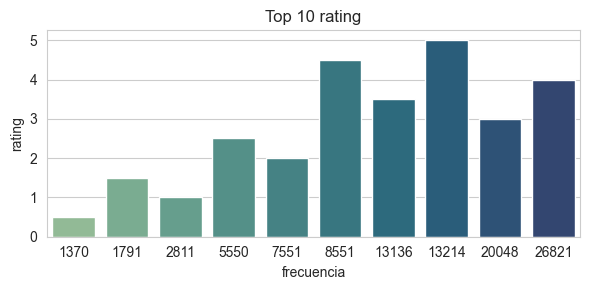


Top 10 en description


,count
description,
Me gustó mucho,6770
Muy buena película,6698
Bien hecha y entretenida,6680
La recomendaría,6670
Ni buena ni mala,5053
Pasable pero nada especial,5017
Entretenida pero olvidable,5002
Película regular,4975
Bastante buena,3356


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


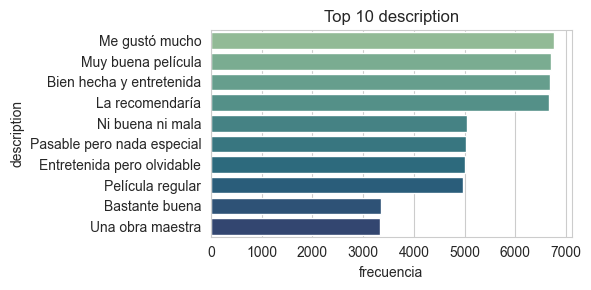

In [9]:
for t in tables:
    explore_table(t)
    



Tabla: movie_genres


,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,INTEGER,0,None,1
1,1,genre_id,INTEGER,0,None,2


,movie_id,genre_id
0,1,16
1,1,12
2,1,10751
3,1,35
4,2,12



Top 10 en genre_id


,count
genre_id,
18,4532
35,3935
53,2034
10749,1977
28,1936
80,1487
12,1406
878,1058
27,1032


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


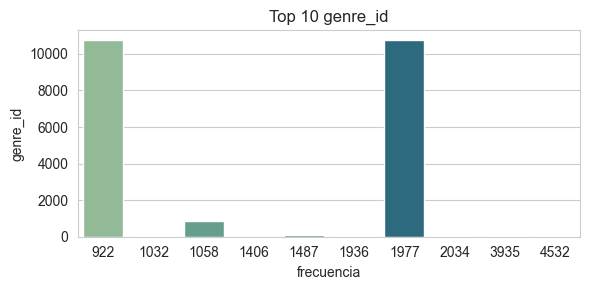

In [10]:
explore_table('movie_genres')


Tabla: genres


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0


,id,name
0,12,Adventure
1,14,Fantasy
2,16,Animation
3,18,Drama
4,27,Horror



Top 10 en id


,count
id,
12,1
80,1
10752,1
10751,1
10749,1
10402,1
9648,1
878,1
99,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


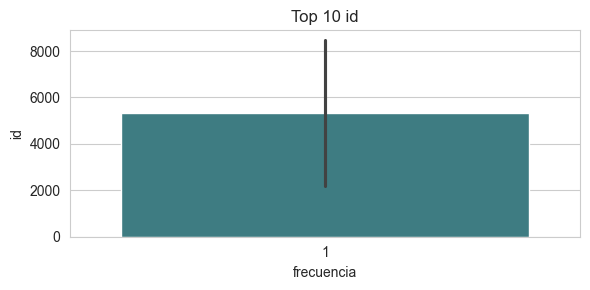


Top 10 en name


,count
name,
Adventure,1
Crime,1
War,1
Family,1
Romance,1
Music,1
Mystery,1
Science Fiction,1
Documentary,1


C:\Users\Abel Perez\AppData\Local\Temp\ipykernel_14696\191988537.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette='crest')


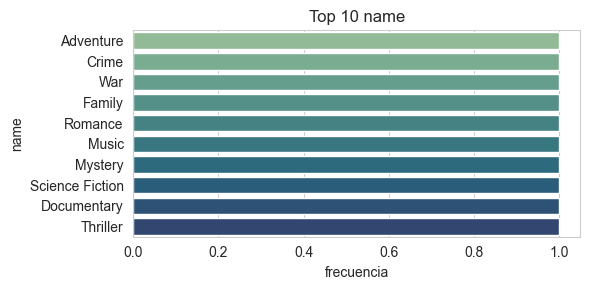

In [11]:
explore_table('genres')